# Booking Analysis # 

##  1. Importing all Necessary Libraries ##

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

## 2. Data Cleaning ##

### Importing Scrapped Data from the final .xlsx file obtained

In [6]:
df = pd.read_excel(r"Final Data Index - 24909.xlsx")

### Initial Data Exploration

In [7]:
df.shape

(24910, 72)

In [8]:
df.columns

Index(['Name', 'Top Destination', 'City', 'URL', 'Review_Score',
       'Number_Reviews', 'Classification', 'Accommodation Type',
       'Rating Stars', 'Rating Squares', 'Sustainable Level', 'Address',
       'Coordinates', 'Property Highlights', 'Description',
       'Outdoor swimming pool', 'Free parking', 'Free WiFi',
       'Facilities for disabled guests', 'Non-smoking rooms', 'Restaurant',
       'Family rooms', 'Bar', 'Very good breakfast', 'Staff ', 'Facilities ',
       'Cleanliness ', 'Comfort ', 'Value for money ', 'Location ',
       'Free WiFi ', 'Room service', 'Airport shuttle', 'Very Good Breakfast',
       '2 swimming pools', 'Airport shuttle (free)', 'Breakfast',
       'Swimming pool', 'Exceptional Breakfast', 'Parking',
       'Tea/Coffee Maker in All Rooms', 'Excellent Breakfast',
       'Wonderful Breakfast', 'Spa', 'Beachfront', 'Good Breakfast',
       'Fitness center', 'Private Parking', 'Pool  – outdoor (kids)',
       'Private beach area', '6 swimming pools'

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24910 entries, 0 to 24909
Data columns (total 72 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Name                            24910 non-null  object 
 1   Top Destination                 24910 non-null  object 
 2   City                            24910 non-null  object 
 3   URL                             24910 non-null  object 
 4   Review_Score                    22197 non-null  float64
 5   Number_Reviews                  22760 non-null  object 
 6   Classification                  22760 non-null  object 
 7   Accommodation Type              0 non-null      float64
 8   Rating Stars                    1510 non-null   float64
 9   Rating Squares                  18682 non-null  float64
 10  Sustainable Level               5826 non-null   object 
 11  Address                         24879 non-null  object 
 12  Coordinates                     

In [10]:
df.head(3)

,Name,Top Destination,City,URL,Review_Score,Number_Reviews,Classification,Accommodation Type,Rating Stars,Rating Squares,...,BBQ facilities,Elevator,5 swimming pools,10 swimming pools,7 swimming pools,WiFi in all areas,Daily housekeeping,Hot tub/Jacuzzi,Baggage storage,Designated smoking area
0,Hotel da Barrosinha,Alentejo,Alcácer do Sal,https://www.booking.com/hotel/pt/albergaria-da...,8.7,"1,385 reviews",Excellent,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alcácer 4Ever Palace,Alentejo,Alcácer do Sal,https://www.booking.com/hotel/pt/alcacer-4-eve...,8.0,304 reviews,Very Good,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pousada Castelo de Alcacer do Sal,Alentejo,Alcácer do Sal,https://www.booking.com/hotel/pt/pousada-d-afo...,8.3,597 reviews,Very Good,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Important note 
There was an issue extracting <b> Accommodation Type </b> variable as noted in df.info() above. Thus, this column will be dropped further in the code

### Change order of the columns - group by respective category

In [11]:
df = df[[
       'Name',
       'Accommodation Type',
       'Top Destination',
       'City',
       'Address',
       'Coordinates',
       'URL',
       'Review_Score',
       'Number_Reviews',
       'Classification',
       'Rating Stars',
       'Rating Squares',
       'Sustainable Level',
       'Property Highlights',
       'Description',
       'Staff ',
       'Facilities ',
       'Cleanliness ',
       'Comfort ',
       'Value for money ',
       'Location ',
       'Free WiFi ',
       'Outdoor swimming pool',
       'Free parking',
       'Free WiFi',
       'Facilities for disabled guests',
       'Non-smoking rooms',
       'Restaurant',
       'Family rooms',
       'Bar',
       'Very good breakfast',
       'Room service',
       'Airport shuttle',
       'Very Good Breakfast',
       '2 swimming pools',
       'Airport shuttle (free)',
       'Breakfast',
       'Swimming pool',
       'Exceptional Breakfast',
       'Parking',
       'Tea/Coffee Maker in All Rooms',
       'Excellent Breakfast',
       'Wonderful Breakfast',
       'Spa',
       'Beachfront',
       'Good Breakfast',
       'Fitness center',
       'Private Parking',
       'Pool  – outdoor (kids)',
       'Private beach area',
       '6 swimming pools',
       '3 swimming pools',
       'Indoor swimming pool',
       'Parking on site',
       '4 swimming pools',
       'WiFi',
       'Heating',
       'Terrace',
       'Garden',
       'Air conditioning',
       'Laundry',
       '24-hour front desk',
       'BBQ facilities',
       'Elevator',
       '5 swimming pools',
       '10 swimming pools',
       '7 swimming pools',
       'WiFi in all areas',
       'Daily housekeeping',
       'Hot tub/Jacuzzi',
       'Baggage storage',
       'Designated smoking area']]

### Variables with Null values

In [12]:
df.columns[df.isnull().any()]

Index(['Accommodation Type', 'Address', 'Coordinates', 'Review_Score',
       'Number_Reviews', 'Classification', 'Rating Stars', 'Rating Squares',
       'Sustainable Level', 'Property Highlights', 'Description', 'Staff ',
       'Facilities ', 'Cleanliness ', 'Comfort ', 'Value for money ',
       'Location ', 'Free WiFi ', 'Outdoor swimming pool', 'Free parking',
       'Free WiFi', 'Facilities for disabled guests', 'Non-smoking rooms',
       'Restaurant', 'Family rooms', 'Bar', 'Very good breakfast',
       'Room service', 'Airport shuttle', 'Very Good Breakfast',
       '2 swimming pools', 'Airport shuttle (free)', 'Breakfast',
       'Swimming pool', 'Exceptional Breakfast', 'Parking',
       'Tea/Coffee Maker in All Rooms', 'Excellent Breakfast',
       'Wonderful Breakfast', 'Spa', 'Beachfront', 'Good Breakfast',
       'Fitness center', 'Private Parking', 'Pool  – outdoor (kids)',
       'Private beach area', '6 swimming pools', '3 swimming pools',
       'Indoor swimming poo

### Convert Variables to Binary <br>

Some variables take value of '1' if they are true and value of 'NaN' if they are not. These will be converted to take the value of '1' or '0' accordingly

In [13]:
columns_to_convert = [
                    'Free parking', 
                    'Facilities for disabled guests',
                    'Non-smoking rooms',
                    'Restaurant',
                    'Family rooms',
                    'Free WiFi ',
                    'Bar',
                    'Room service',
                    'Airport shuttle',
                    'Airport shuttle (free)',
                    'Breakfast',
                    'Parking',
                    'Tea/Coffee Maker in All Rooms',
                    'Spa',
                    'Beachfront',
                    'Fitness center',
                    'Private Parking',
                    'Private beach area',
                    'Parking on site',
                    'Heating',
                    'Terrace',
                    'Garden',
                    'Air conditioning',
                    'Laundry',
                    '24-hour front desk',
                    'BBQ facilities',
                    'Elevator',
                    'WiFi in all areas',
                    'Daily housekeeping',
                    'Hot tub/Jacuzzi',
                    'Baggage storage',
                    'Designated smoking area',
                    'Outdoor swimming pool', 
                    '2 swimming pools',
                    'Swimming pool',  
                    'Pool  – outdoor (kids)', 
                    '6 swimming pools', 
                    '3 swimming pools',
                    'Indoor swimming pool',
                    '4 swimming pools',
                    '5 swimming pools',
                    '10 swimming pools', 
                    '7 swimming pools',
                    'Very good breakfast', 
                    'Very Good Breakfast',
                    'Excellent Breakfast',  
                    'Wonderful Breakfast', 
                    'Good Breakfast',
                    'Exceptional Breakfast',
                    'Free WiFi', 
                    'WiFi'
                    ]

In [14]:
# Fill NaN values with '0'
df[columns_to_convert] = df[columns_to_convert].fillna(0).astype(int)

### Fill missing values 

Missing values from Reviews to be filled with zeros

In [15]:
columns_to_convert = [
                    'Review_Score',
                    'Staff ',
                    'Facilities ',
                    'Cleanliness ',
                    'Comfort ',
                    'Value for money ',
                    'Location ',
                    'Free WiFi '
                    ]

In [16]:
# Fill NaN values with '0'
df[columns_to_convert] = df[columns_to_convert].fillna(0)

Missing values on 'Sustainable Level' represent less sustainable accommodations, thus they will be filled with 'Travel Sustainable Level 0'

In [17]:
# Fill NaN values with 'Travel Sustainable Level 0'
df['Sustainable Level'] = df['Sustainable Level'].fillna('Travel Sustainable Level 0')

### Create New Variables

<b> Has Swimming Pool </b> - Takes value of '1' if it has at least one swimming pool and value of '0' if it does not

In [18]:
# List of columns that indicate wether the facility has a pool or not
pool_columns = [
       'Outdoor swimming pool', 
       '2 swimming pools',
       'Swimming pool',  
       'Pool  – outdoor (kids)', 
       '6 swimming pools', 
       '3 swimming pools',
       'Indoor swimming pool',
       '4 swimming pools',
       '5 swimming pools',
       '10 swimming pools', 
       '7 swimming pools']

# 'HasSwimmingPools' should take value of '1' if it has a swimming pool and '0' if not
df['Has Swimming Pool'] = df[pool_columns].any(axis=1).astype(int)

# Check possible values
print(df['Has Swimming Pool'].unique())

[1 0]


<b> Has Nice Breakfast </b> - Takes value of '1' of they are considered to have a Nice breakfast and '0' if not

In [19]:
# List of columns that indicate wether the facility has a good breakfast or not
breakfast_columns = [
       'Very good breakfast', 
       'Very Good Breakfast',
       'Excellent Breakfast',  
       'Wonderful Breakfast', 
       'Good Breakfast',
       'Exceptional Breakfast']

# 'Has Nice Breakfast' should take value of '1' if it has a nice breakfast and '0' if not
df['Has Nice Breakfast'] = df[breakfast_columns].any(axis=1).astype(int)

# Check possible values
print(df['Has Nice Breakfast'].unique())

[1 0]


<b> Has WiFi </b> - Joins both 'Free WiFi' and 'WiFi' variables

In [20]:
# Check if they are the same (have the same values)
df['Free WiFi'].equals(df['WiFi'])

False

In [21]:
print(df['Free WiFi'].unique())
print(df['WiFi'].unique())

[1 0]
[0 1]


In [22]:
# We can set to '1' if its 0 in one variable or the other
wifi_columns = ['Free WiFi', 'WiFi']

# 'Has WiFi' should take value of '1' if it has WiFi and '0' if not
df['Has WiFi'] = df[wifi_columns].any(axis=1).astype(int)

# Check possible values
print(df['Has WiFi'].unique())


[1 0]


<b> Number of amenities </b> - Counts the number of amenities of the acommodations

In [23]:
amenities_columns = [
        'Free parking',
        'Facilities for disabled guests', 
        'Non-smoking rooms',
        'Restaurant', 
        'Family rooms', 
        'Bar', 
        'Room service',
        'Airport shuttle', 
        'Airport shuttle (free)', 
        'Breakfast',
        'Parking', 
        'Tea/Coffee Maker in All Rooms', 
        'Spa',
        'Beachfront',
        'Fitness center',
        'Private Parking',
        'Private beach area',
        'Parking on site',
        'Heating',
        'Terrace',
        'Garden',
        'Air conditioning',
        'Laundry',
        '24-hour front desk',
        'BBQ facilities',
        'Elevator',
        'WiFi in all areas',
        'Daily housekeeping',
        'Hot tub/Jacuzzi',
        'Baggage storage',
        'Designated smoking area',
        'Has Swimming Pool',
        'Has Nice Breakfast',
        'Has WiFi']

In [24]:
df['Total Number Amenities'] = df[amenities_columns].sum(axis=1)

# Check possible values of new variable
df['Total Number Amenities'].unique()

array([ 9,  8, 10,  3,  4,  2,  5,  6,  1,  7,  0], dtype=int64)

<b>Is Hotel</b> - Takes value of '1' if it is an Hotel and value of '0' if it is not

In [25]:
# Hotels have rating values in 'Rating Stars' and no ratings in 'Rating Squares'

# Check first if there is any row with both filled
filter_notnull = df['Rating Stars'].notnull() & df['Rating Squares'].notnull()
df[filter_notnull].shape[0]

0

In [26]:
# Create 'Is Hotel' variable
df['Is Hotel'] = (df['Rating Stars'].notnull() & df['Rating Squares'].isnull()).astype(int)

<b> Rating </b> - joining of 'Rating Stars' and 'Rating Squares'

In [27]:
# Function combine_first used to fill NaN values of 'Rating Stars' with the values of 'Rating Squares'
df['Rating'] = df['Rating Stars'].combine_first(df['Rating Squares'])

# Check possible values of new variable
df['Rating'].unique()

array([ 4., nan,  3.,  2.,  5.,  1.])

<b> Latitude & Longitude </b> - spliting of Coordinate column

In [28]:
df[['Latitude', 'Longitude']] = df['Coordinates'].str.split(',', expand=True)

### Drop unnecessary variables

In [29]:
# Swimming pool variables can be dropped
df.drop(pool_columns, axis = 1, inplace = True)

In [30]:
# Breakfast variables can be dropped
df.drop(breakfast_columns, axis = 1, inplace = True)

In [31]:
# WiFi variables can be dropped
df.drop(wifi_columns, axis = 1, inplace = True)

In [32]:
# 'Rating Starts' and 'Rating Squares' were combined so they can be dropped
df.drop(['Rating Stars', 'Rating Squares'], axis = 1, inplace = True)

In [33]:
# 'Accommodation Type' can be dropped as it was not extracted from the website
df.drop('Accommodation Type', axis = 1, inplace = True)

In [34]:
# 'Coordinates' can be dropped as it was not extracted from the website
df.drop('Coordinates', axis = 1, inplace = True)

### Drop unnecessary rows

Drop acommodations without Address 

In [35]:
# Check number of rows without address
filter_noaddress = df['Address'].isnull() 
df[filter_noaddress].shape[0]

31

In [36]:
# Since only 31 rows out of 24k don't have address they can be dropped
df = df.dropna(subset = ['Address'])

### Clean Variables

Number_Reviews has numbers combined with strings (e.g., 100 reviews) - keep only the number values

In [37]:
# Replace commas with an empty space
df['Number_Reviews'] = df['Number_Reviews'].str.replace(',', '')

# Number_Reviews variable should maintain only the numbers
df['Number_Reviews'] = df['Number_Reviews'].apply(lambda x: int(x.split()[0]) if pd.notnull(x) else x)

df['Number_Reviews'] = df['Number_Reviews'].fillna(0).astype(int)

Sustainable Level to maintain only the Level

In [38]:
# Number_Reviews variable should maintain only the numbers
df['Sustainable Level'] = df['Sustainable Level'].apply(lambda x: x.split()[-1] if pd.notnull(x) else x)

In [39]:
df['Sustainable Level'].value_counts()

0       19053
1        3684
2        1733
3         312
Plus       97
Name: Sustainable Level, dtype: int64

### Rename Variables

In [40]:
df.rename(
        columns = {
            'Staff ': 'Staff Review',
            'Facilities ': 'Facilities Review',
            'Free WiFi ' : 'Free WiFi Review',
            'Cleanliness ' : 'Cleanliness Review',
            'Comfort ' : 'Comfort Review',
            'Value for money ' : 'Value for money Review',
            'Location ' : 'Location Review',
            'Free parking' : 'Has Free parking',
            'Facilities for disabled guests' : 'Has Facilities for disabled guests',
            'Non-smoking rooms' : 'Has Non Smoking rooms',
            'Restaurant' : 'Has Restaurant',
            'Family rooms' : 'Has Family rooms',
            'Bar' : 'Has Bar',
            'Room service' : 'Has Room service',
            'Airport shuttle' : 'Has Airport shuttle',
            'Airport shuttle (free)' : 'Has Free Airport shuttle',
            'Breakfast' : 'Has Breakfast',
            'Parking' : 'Has Parking',
            'Tea/Coffee Maker in All Rooms' : 'Has Tea Or Coffee Maker in All Rooms',
            'Spa' : 'Has Spa',
            'Beachfront' : 'Has Beachfront',
            'Fitness center' : 'Has Fitness center',
            'Private Parking' : 'Has Private Parking',
            'Private beach area' : 'Has Private beach area',
            'Parking on site' : 'Has Parking on site',
            'Heating' : 'Has Heating',
            'Terrace' : 'Has Terrace',
            'Garden' : 'Has Garden',
            'Air conditioning' : 'Has Air conditioning',
            'Laundry' : 'Has Laundry',
            '24-hour front desk' : 'Has 24 hour front desk',
            'BBQ facilities' : 'Has BBQ facilities',
            'Elevator' : 'Has Elevator',
            'WiFi in all areas' : 'Has WiFi in all areas',
            'Daily housekeeping' : 'Has Daily housekeeping',
            'Hot tub/Jacuzzi' : 'Has Hot tub or Jacuzzi',
            'Baggage storage' : 'Has Baggage storage',
            'Designated smoking area' : 'Has Designated smoking area',
            'Review_Score' : 'Review Score',
            'Number_Reviews' : 'Number Reviews'
        }, 
        inplace = True)

### Check PreProcessed DataSet

In [41]:
df.columns

Index(['Name', 'Top Destination', 'City', 'Address', 'URL', 'Review Score',
       'Number Reviews', 'Classification', 'Sustainable Level',
       'Property Highlights', 'Description', 'Staff Review',
       'Facilities Review', 'Cleanliness Review', 'Comfort Review',
       'Value for money Review', 'Location Review', 'Free WiFi Review',
       'Has Free parking', 'Has Facilities for disabled guests',
       'Has Non Smoking rooms', 'Has Restaurant', 'Has Family rooms',
       'Has Bar', 'Has Room service', 'Has Airport shuttle',
       'Has Free Airport shuttle', 'Has Breakfast', 'Has Parking',
       'Has Tea Or Coffee Maker in All Rooms', 'Has Spa', 'Has Beachfront',
       'Has Fitness center', 'Has Private Parking', 'Has Private beach area',
       'Has Parking on site', 'Has Heating', 'Has Terrace', 'Has Garden',
       'Has Air conditioning', 'Has Laundry', 'Has 24 hour front desk',
       'Has BBQ facilities', 'Has Elevator', 'Has WiFi in all areas',
       'Has Daily housekee

In [42]:
df.shape

(24879, 57)

In [43]:
df.columns[df.isnull().any()]


Index(['Classification', 'Property Highlights', 'Description', 'Rating'], dtype='object')

In [44]:
df.isna().sum()

Name                                        0
Top Destination                             0
City                                        0
Address                                     0
URL                                         0
Review Score                                0
Number Reviews                              0
Classification                           2131
Sustainable Level                           0
Property Highlights                     17148
Description                                 1
Staff Review                                0
Facilities Review                           0
Cleanliness Review                          0
Comfort Review                              0
Value for money Review                      0
Location Review                             0
Free WiFi Review                            0
Has Free parking                            0
Has Facilities for disabled guests          0
Has Non Smoking rooms                       0
Has Restaurant                    

Save df as excel

In [45]:
df.to_excel("booking_data_treated.xlsx", index=False)

For Dashboard remove URL

In [46]:
df_dash = df.drop('URL', axis = 1)

df_dash.to_excel("booking_dash_data.xlsx", index=False)

## 3. Final Variables Explanation

Name and Description of the 56 variables in the Dataset

- <b> Name </b>: Name of the Accommodation.
- <b> Top Destination </b>: Top Destination of Booking that the accommodation belongs to 
- <b> City </b>: Name of the city
- <b> Address </b>: Full Address
- <b> Coordinates </b>: Coordinates of the property
- <b> URL </b>: URL to the accommodation's Booking Webpage
- <b> Review Score </b>: Reviers' average score (1 to 10)
- <b> Number Reviews </b>: Number of reviews
- <b> Classification </b>: "Good", "Great", "Excellent" etc
- <b> Sustainable Level </b>: Sustainability Level of the hotel (Nono to 3) (Plus)
- <b> Property Highlights </b>: Main highlights of the property
- <b> Description </b>: Full Description of the accomodation
- <b> Staff Review </b>: Review of the Staff (1 to 10)
- <b> Facilities Review </b>: Review of the Facilities (1 to 10)
- <b> Free WiFi Review </b>: Review of the WiFi (1 to 10)
- <b> Cleanliness Review </b>: Review of the Cleanliness (1 to 10)
- <b> Comfort Review </b>: Review of the Comfort (1 to 10)
- <b> Value for money Review </b>: Review of the Value for money (1 to 10)
- <b> Location Review </b>: Review of the Location (1 to 10)
- <b> Has Free parking </b>: '1' if it has Free Parking '0' otherwise
- <b> Has Facilities for disabled guests </b>: '1' if it has Facilities for disabled guests '0' otherwise
- <b> Has Non- smoking rooms </b>: '1' if it has Non- smoking rooms '0' otherwise
- <b> Has Restaurant </b>: '1' if it has a Restaurant '0' otherwise
- <b> Has Family rooms </b>: '1' if it has Family rooms '0' otherwise
- <b> Has Bar </b>: '1' if it has Bar '0' otherwise
- <b> Has Room service </b>: '1' if it has Room service '0' otherwise
- <b> Has Airport shuttle </b>: '1' if it has Airport shuttle '0' otherwise
- <b> Has Airport shuttle (free) </b>: '1' if it has Airport shuttle (free) '0' otherwise
- <b> Has Breakfast </b>: '1' if it has Breakfast '0' otherwise
- <b> Has Parking </b>: '1' if it has Parking '0' otherwise
- <b> Has Tea/Coffee Maker in All Rooms </b>: '1' if it has Tea/Coffee Maker in All Rooms  '0' otherwise
- <b> Has Spa </b>: '1' if it has Spa '0' otherwise
- <b> Has Beachfront </b>: '1' if it has Beachfront '0' otherwise
- <b> Has Fitness center </b>: '1' if it has Fitness center '0' otherwise
- <b> Has Private Parking </b>: '1' if it has Private Parking '0' otherwise
- <b> Has Private beach area </b>: '1' if it has Private beach area '0' otherwise
- <b> Has Parking on site </b>: '1' if it has Parking on site '0' otherwise
- <b> Has Heating </b>: '1' if it has Heating '0' otherwise
- <b> Has Terrace </b>: '1' if it has Terrace '0' otherwise
- <b> Has Garden </b>: '1' if it has Garden '0' otherwise
- <b> Has Air conditioning </b>: '1' if it has Air conditioning  '0' otherwise
- <b> Has Laundry </b>: '1' if it has Laundry '0' otherwise
- <b> Has 24- hour front desk </b>: '1' if it has 24- hour front desk '0' otherwise
- <b> Has BBQ facilities </b>: '1' if it has FBBQ facilities '0' otherwise
- <b> Has Elevator </b>: '1' if it has Elevator '0' otherwise
- <b> Has WiFi in all areas </b>: '1' if it has WiFi in all areas '0' otherwise
- <b> Has Daily housekeeping </b>: '1' if it has Daily housekeeping '0' otherwise
- <b> Has Hot tub/Jacuzzi </b>: '1' if it has Hot tub/Jacuzzi '0' otherwise
- <b> Has Baggage storage </b>: '1' if it has aggage storage '0' otherwise
- <b> Has Designated smoking area </b>: '1' if it has Designated smoking area '0' otherwise
- <b> Has Swimming Pool </b>: '1' if is has a Swimming Pool '0' otherwise
- <b> Has Nice Breakfast </b>: '1' if is has a Nice Breakfast '0' otherwise
- <b> Has WiFi </b>: '1' if is has a WiFi '0' otherwise
- <b> Is Hotel </b>: '1' if is a Hotel '0' otherwise
- <b> Rating </b>: Rating of the facility (1 to 5)
- <b> Total Number Amenities </b>: Number of Amenities the accommodation provides 

## 4. Data Exploration

### Scatterplot Number of Reviews VS Review Score

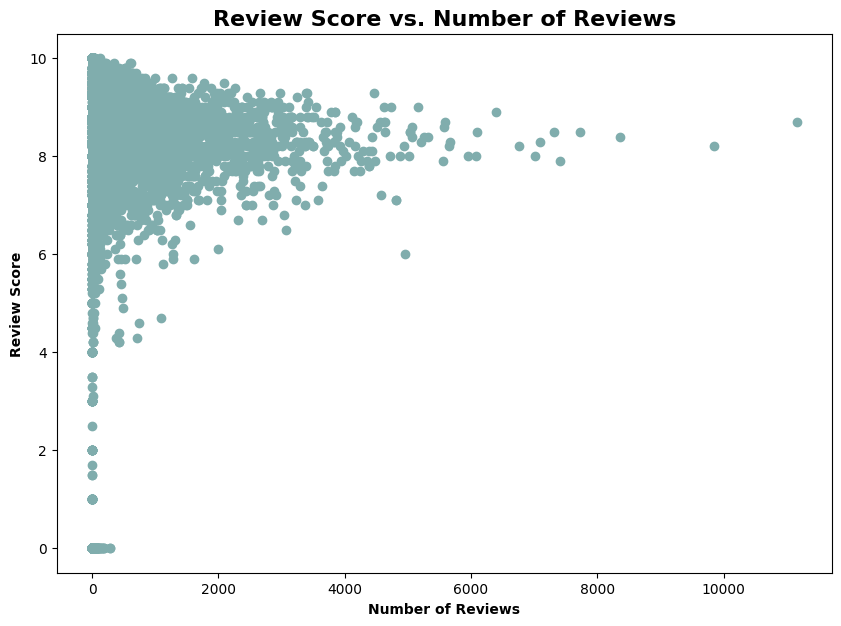

In [47]:
plt.figure(figsize=(10, 7)) 

# Scatter plot
plt.scatter(df['Number Reviews'], df['Review Score'], color = '#80ADAD')

# Title and Axis configurations
plt.title('Review Score vs. Number of Reviews', fontsize = 16, fontweight='bold')
plt.xlabel('Number of Reviews', fontweight = 'bold')
plt.ylabel('Review Score', fontweight = 'bold')

# Display the plot
plt.show()

### Bar Plot of Sustainable Levels

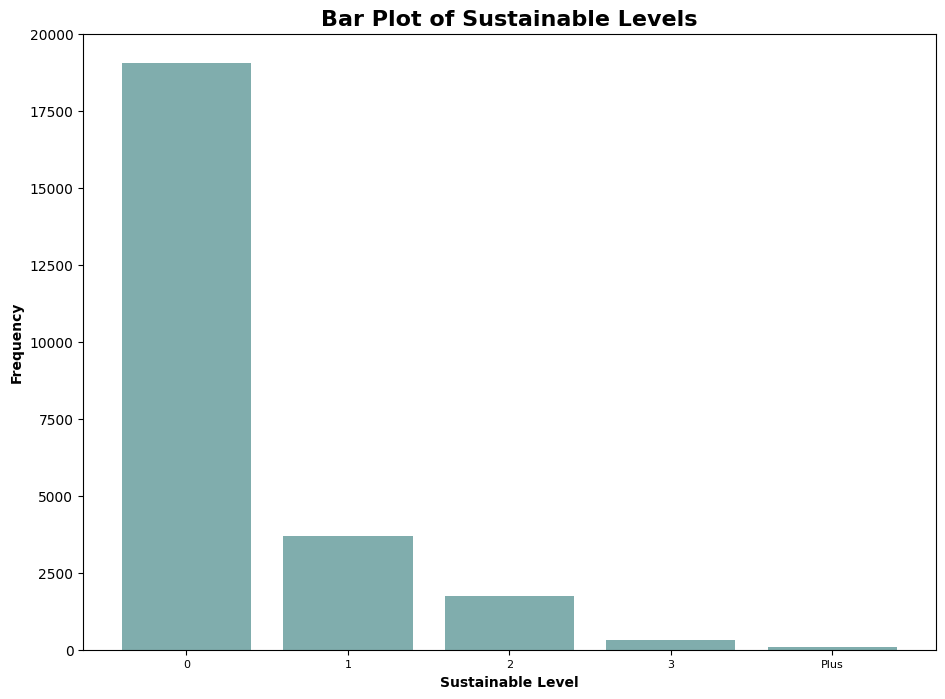

In [48]:
plt.figure(figsize=(11, 8)) 

sustainablelevels = df['Sustainable Level'].value_counts()

# Create the bar plot
plt.bar(sustainablelevels.index, sustainablelevels.values, color='#80ADAD')

# Title and Axis configurations
plt.title('Bar Plot of Sustainable Levels', fontsize = 16, fontweight='bold')
plt.xlabel('Sustainable Level', fontweight = 'bold')
plt.ylabel('Frequency', fontweight = 'bold')
plt.xticks(fontsize=8)

# Display the plot
plt.show()

### Stacked Bar plot - Amenities 

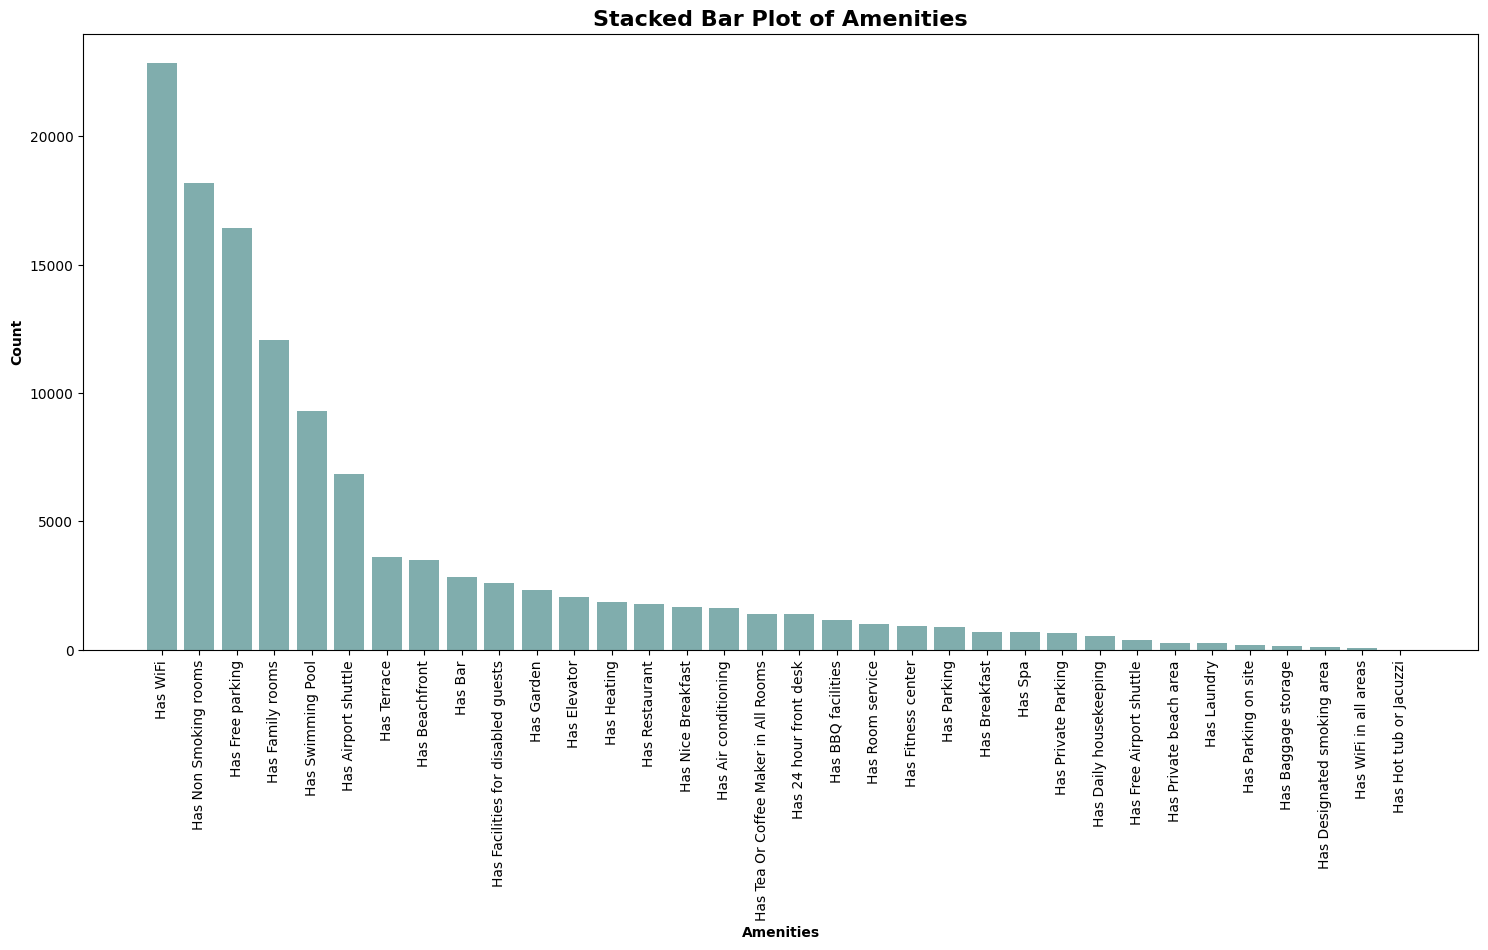

In [49]:
plt.figure(figsize=(18, 8)) 

amenities_columns = df.columns[18:52] 
amenities = df[amenities_columns].sum()

# Sort it by frequency
amenities_sorted = amenities.sort_values(ascending=False)

# Create the stacked bar plot
plt.bar(amenities_sorted.index, amenities_sorted.values, color='#80ADAD')

# Title and Axis configurations
plt.title('Stacked Bar Plot of Amenities', fontsize = 16, fontweight='bold')
plt.xlabel('Amenities', fontweight = 'bold')
plt.ylabel('Count', fontweight = 'bold')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Display the plot
plt.show()

# 5. Results and Discussion

### Table - Type of Accommodation

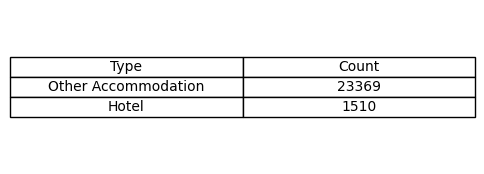

In [50]:
# Count number accommodations by type
hotel_count = df['Is Hotel'].value_counts()

# Create data
data = pd.DataFrame({'Type': ['Other Accommodation', 'Hotel'], 'Count': hotel_count.values})

# Create Figure
fig, ax = plt.subplots(figsize=(5, 2))

# Configure Table
table = plt.table(cellText=data.values,
                  colLabels=data.columns,
                  cellLoc='center',
                  loc='center')

# Configure table style
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Remove axis
ax.axis('off')

# Show Table
plt.show()

### Review Score Line plot

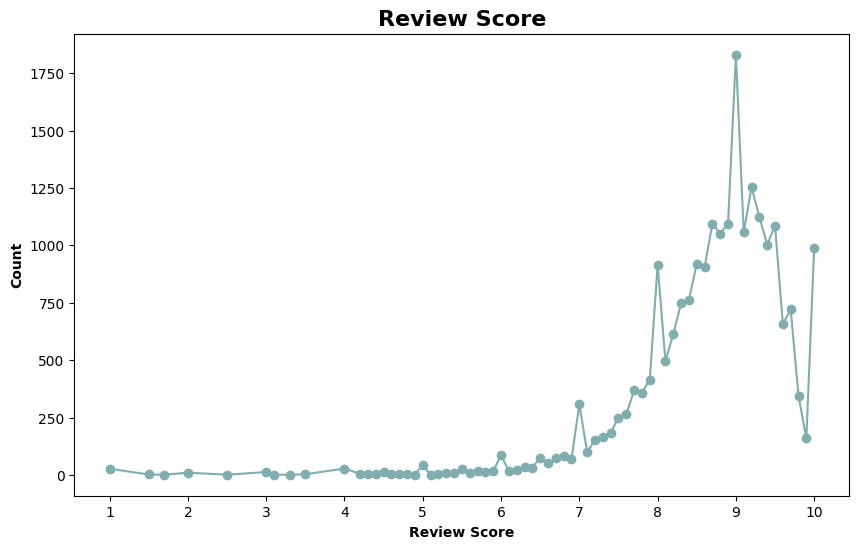

In [51]:
plt.figure(figsize=(10, 6))

Review_Score = df[df['Review Score'] > 0]['Review Score'].value_counts().sort_index()

# Line plot
plt.plot(Review_Score.index, Review_Score.values, color='#80ADAD', marker='o')

# Title and Axis configurations
plt.title('Review Score', fontsize=16, fontweight='bold')
plt.xlabel('Review Score', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xticks(range(int(min(Review_Score.index)), int(max(Review_Score.index))+1))

plt.show()

### Table - Type Accommodation - Filtered by Review Score and Number of Reviews

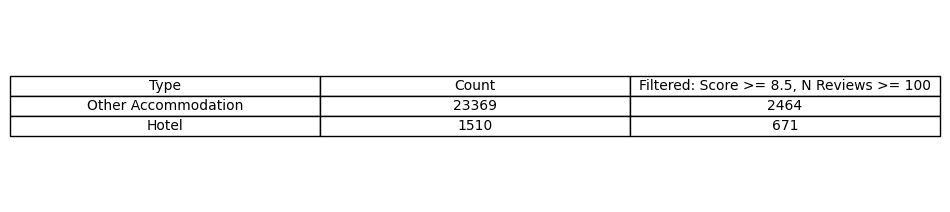

In [52]:
# Filter Hotels with Review Score >= 8,5 and over 100 reviews
hotels_filtered = df[(df['Is Hotel'] == 1) & (df['Review Score'] >= 8.5) & (df['Number Reviews'] >= 100)]

# Filter other accommodations with Review Score >= 8,5 and over 100 reviews
other_accommodation_filtered = df[(df['Is Hotel'] == 0) & (df['Review Score'] >= 8.5) & (df['Number Reviews'] >= 100)]

# Count filtered number of hotels and other accommodations
filtered_hotel_count = len(hotels_filtered)
filtered_other_accommodation_count = len(other_accommodation_filtered)

# Count total number of hotels and other accommodations
total_hotel_count = df[df['Is Hotel'] == 1]['Is Hotel'].count()
total_other_accommodation_count = df[df['Is Hotel'] == 0]['Is Hotel'].count()

# Create dataframe with data
data = pd.DataFrame({'Type': ['Other Accommodation', 'Hotel'],
                     'Count': [total_other_accommodation_count, total_hotel_count],
                     'Filtered: Score >= 8.5, N Reviews >= 100': [filtered_other_accommodation_count, filtered_hotel_count]})

# Create figure
fig, ax = plt.subplots(figsize=(10, 2.5))

# Configure table
table = plt.table(cellText=data.values,
                  colLabels=data.columns,
                  cellLoc='center',
                  loc='center')

# Configure table style
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Remove axis
ax.axis('off')

# Save figure for report
plt.savefig('Table_Type_Accommodation.jpg')

# Show table
plt.show()

### Review Score Line plot - by Accommodation Type

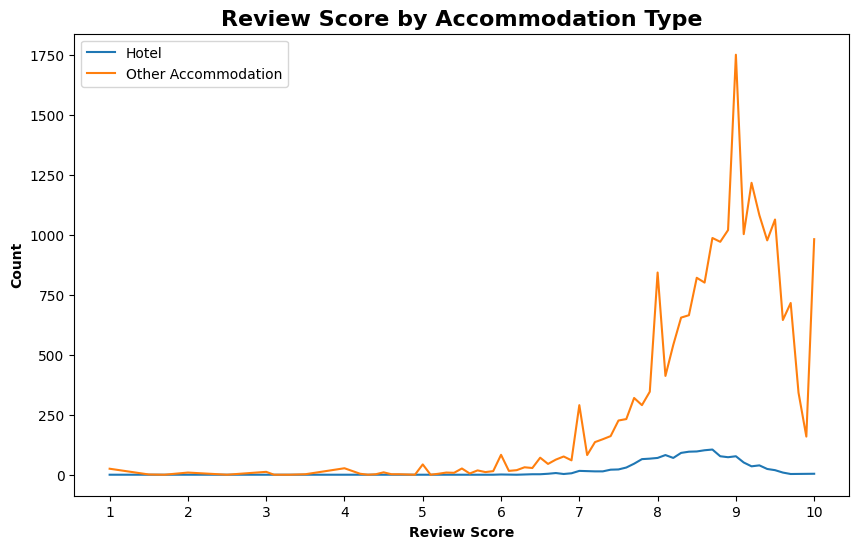

In [53]:
plt.figure(figsize=(10, 6))

# Filter data and remove absent values
df_filtered = df[df['Review Score'] > 0] 

# Create a cope of the filtered data
df_filtered_copy = df_filtered.copy()

# Map values of "Is Hotel" to the desired labels
df_filtered_copy["Is Hotel"] = df_filtered_copy["Is Hotel"].map({0: "Other Accommodation", 1: "Hotel"})

# Group data by "Review Score" and "Is Hotel" and count number of occurences
grouped_data = df_filtered_copy.groupby(["Review Score", "Is Hotel"]).size().reset_index(name="Count")

# Line plot
sns.lineplot(data=grouped_data, x="Review Score", y="Count", hue="Is Hotel")

# Title and Axis configurations
plt.title('Review Score by Accommodation Type', fontsize=16, fontweight='bold')
plt.xlabel('Review Score', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xticks(range(int(min(Review_Score.index)), int(max(Review_Score.index))+1))

# Configure labels
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ["Other Accommodation" if label == "Other Accommodation" else "Hotel" for label in labels]
plt.legend(handles, new_labels)

# Save figure for report
plt.savefig('Review_Score_Type.jpg')

# Show Figure
plt.show()

## Targeted Data - Review Score >= 8.5 and Number Reviews >= 100

### Table - Number of amenities

In [54]:
# Filter hotels with Review Score >= 8,5 and over 100 reviews
hotels_filtered = df[(df['Is Hotel'] == 1) & (df['Review Score'] >= 8.5) & (df['Number Reviews'] >= 100)]

# Filter Other Accommodations with Review Score >= 8,5 and over 100 reviews
other_accommodations_filtered = df[(df['Is Hotel'] == 0) & (df['Review Score'] >= 8.5) & (df['Number Reviews'] >= 100)]

# Calculate amenities count for each category
amenities_hotels_filtered = hotels_filtered.iloc[:, 19:53].sum()
amenities_other_accommodations_filtered = other_accommodations_filtered.iloc[:, 19:53].sum()

# Order amenties DESC
amenities_hotels_sorted = amenities_hotels_filtered.sort_values(ascending=False)
amenities_other_accommodations_sorted = amenities_other_accommodations_filtered.sort_values(ascending=False)

# Create tables
hotels_table = pd.DataFrame({'Amenities': amenities_hotels_sorted.index,
                             'Count': amenities_hotels_sorted.values})
other_accommodations_table = pd.DataFrame({'Amenities': amenities_other_accommodations_sorted.index,
                                           'Count': amenities_other_accommodations_sorted.values})


# Show tables
print("Amenities - Hotels:")
print(hotels_table)

print("Amenities - Other Accommodations:")
print(other_accommodations_table)

Amenities - Hotels:
                               Amenities  Count
0                 Total Number Amenities   6255
1                               Has WiFi    661
2                                Has Bar    558
3                  Has Non Smoking rooms    555
4                     Has Nice Breakfast    478
5                       Has Family rooms    429
6                      Has Swimming Pool    388
7     Has Facilities for disabled guests    384
8                         Has Restaurant    361
9                    Has Airport shuttle    328
10                    Has Fitness center    238
11                Has 24 hour front desk    229
12                               Has Spa    225
13                      Has Room service    217
14  Has Tea Or Coffee Maker in All Rooms    206
15                   Has Private Parking    142
16                          Has Elevator     94
17                           Has Terrace     80
18                        Has Beachfront     72
19                  

### Histograms - Percentage of Amenities by type of Accommodation

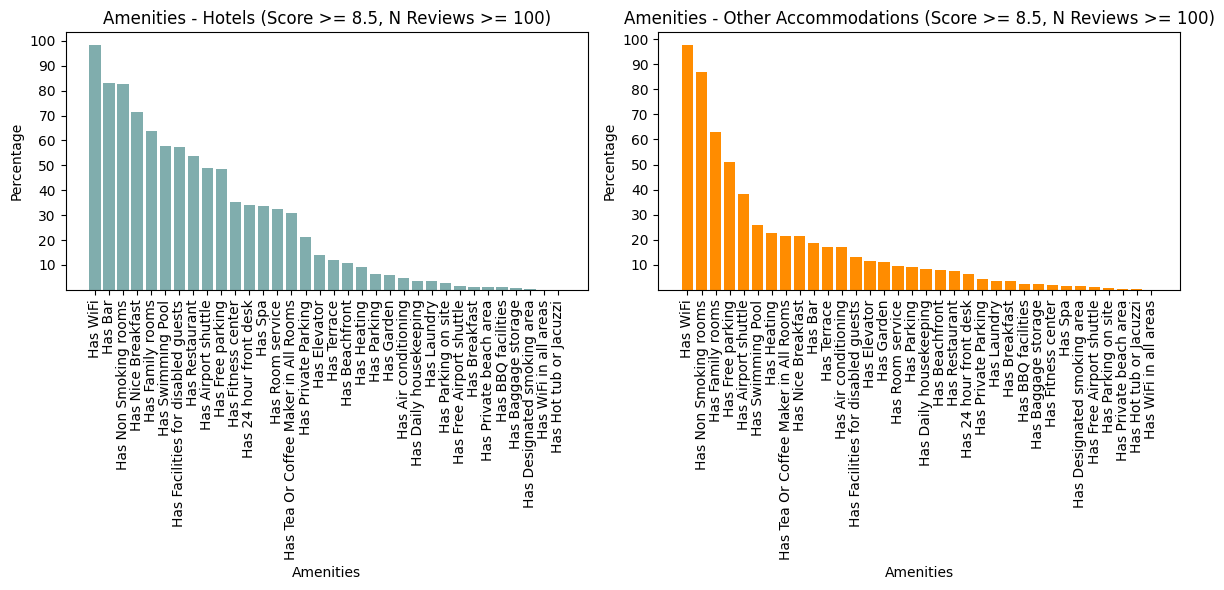

In [55]:
# Filter hotels with Review Score >= 8,5 and over 100 reviews
hotels_filtered = df[(df['Is Hotel'] == 1) & (df['Review Score'] >=8.5) & (df['Number Reviews'] >= 100)]

# Filter Other Accommodations with Review Score >= 8,5 and over 100 reviews
non_hotels_filtered = df[(df['Is Hotel'] == 0) & (df['Review Score'] >= 8.5) & (df['Number Reviews'] >= 100)]

# Calculate total number for each category
total_hotels = len(hotels_filtered)
total_non_hotels = len(non_hotels_filtered)

# Calculate in percentage
amenities_hotels_filtered = hotels_filtered.iloc[:, 18:52].sum() / total_hotels * 100
amenities_non_hotels_filtered = non_hotels_filtered.iloc[:, 18:52].sum() / total_non_hotels * 100

# Order amenities DESC 
amenities_hotels_sorted = amenities_hotels_filtered.sort_values(ascending=False)
amenities_non_hotels_sorted = amenities_non_hotels_filtered.sort_values(ascending=False)

# Create figure and subplots 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot Hotels graph 
ax1.bar(range(len(amenities_hotels_sorted)), amenities_hotels_sorted.values, color='#80ADAD')
ax1.set_title('Amenities - Hotels (Score >= 8.5, N Reviews >= 100)')
ax1.set_xlabel('Amenities')
ax1.set_ylabel('Percentage')
ax1.set_yticks(range(10, 101, 10))
ax1.set_xticks(range(len(amenities_hotels_sorted)))
ax1.set_xticklabels(amenities_hotels_sorted.index, rotation=90)

# Plot Other Accommodations graph 
ax2.bar(range(len(amenities_non_hotels_sorted)), amenities_non_hotels_sorted.values, color='#FF8C00')
ax2.set_title('Amenities - Other Accommodations (Score >= 8.5, N Reviews >= 100)')
ax2.set_xlabel('Amenities')
ax2.set_ylabel('Percentage')
ax2.set_yticks(range(10, 101, 10))
ax2.set_xticks(range(len(amenities_non_hotels_sorted)))
ax2.set_xticklabels(amenities_non_hotels_sorted.index, rotation=90)

# Adjust subplots 
plt.tight_layout()

# Save figure for report
plt.savefig('Amenities_Type_Accommodation.jpg')

# Show figures
plt.show()

### Table - Amenities that are in more than 50% of the Accommodations (by Type of Accommodation)

In [56]:
# Filter amenities that are in more than 50% of the accommodation for Hotels
amenities_hotels_over_50 = amenities_hotels_filtered[amenities_hotels_filtered >= 50].sort_values(ascending=False)

# Filter amenities that are in more than 50% of the accommodation for Other Accommodations
amenities_non_hotels_over_50 = amenities_non_hotels_filtered[amenities_non_hotels_filtered >= 50].sort_values(ascending=False)

# Print values for Hotels
print("Amenities for Hotels:")
print(amenities_hotels_over_50)

# Print values for Other Accommodations
print("Amenities for Other Accommodations:")
print(amenities_non_hotels_over_50)

Amenities for Hotels:
Has WiFi                              98.509687
Has Bar                               83.159463
Has Non Smoking rooms                 82.712370
Has Nice Breakfast                    71.236960
Has Family rooms                      63.934426
Has Swimming Pool                     57.824143
Has Facilities for disabled guests    57.228018
Has Restaurant                        53.800298
dtype: float64
Amenities for Other Accommodations:
Has WiFi                 97.849026
Has Non Smoking rooms    87.094156
Has Family rooms         62.905844
Has Free parking         51.095779
dtype: float64


### Bar Plot - Type of Review

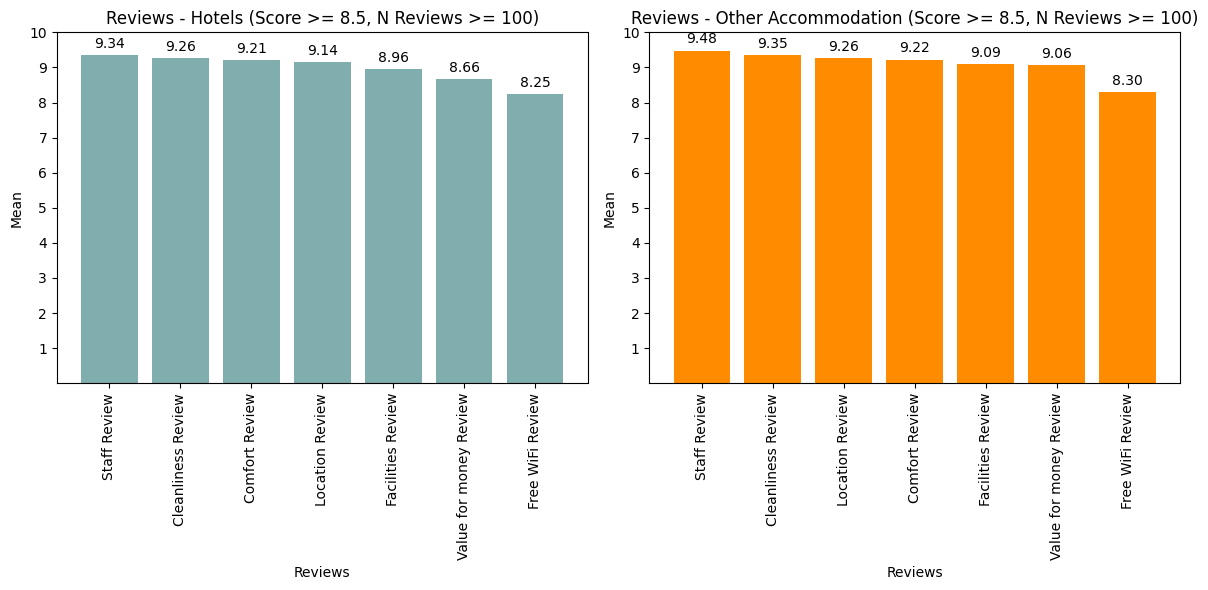

In [65]:
# Filter hotels with Review Score >= 8,5 and over 100 reviews
hotels_filtered = df[(df['Is Hotel'] == 1) & (df['Review Score'] >=8.5) & (df['Number Reviews'] >= 100)]

# Filter other accommodations with Review Score >= 8,5 and over 100 reviews
non_hotels_filtered = df[(df['Is Hotel'] == 0) & (df['Review Score'] >= 8.5) & (df['Number Reviews'] >= 100)]

# Average number of reviews for each category
reviews_hotels_filtered = hotels_filtered.iloc[:, 11:18].mean()
reviews_non_hotels_filtered = non_hotels_filtered.iloc[:, 11:18].mean()

# Order reviews DESC
reviews_hotels_sorted = reviews_hotels_filtered.sort_values(ascending=False)
reviews_non_hotels_sorted = reviews_non_hotels_filtered.sort_values(ascending=False)

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot Hotels graph
bars1 = ax1.bar(reviews_hotels_sorted.index, reviews_hotels_sorted.values, color='#80ADAD')
ax1.set_title('Reviews - Hotels (Score >= 8.5, N Reviews >= 100)')
ax1.set_xlabel('Reviews')
ax1.set_ylabel('Mean')
ax1.set_ylim(0, 10)  # Define o limite do eixo y até 10
ax1.set_yticks(range(1, 11))  # Define os ticks do eixo y de 1 em 1
ax1.set_xticks(range(len(reviews_hotels_sorted)))
ax1.set_xticklabels(reviews_hotels_sorted.index, rotation=90)

# Add values to columns
ax1.bar_label(bars1, labels=[f'{val:.2f}' for val in reviews_hotels_sorted.values], padding=3)

# Plot Other Accommodations graph
bars2 = ax2.bar(reviews_non_hotels_sorted.index, reviews_non_hotels_sorted.values, color='#FF8C00')
ax2.set_title('Reviews - Other Accommodation (Score >= 8.5, N Reviews >= 100)')
ax2.set_xlabel('Reviews')
ax2.set_ylabel('Mean')
ax2.set_ylim(0, 10)  # Define o limite do eixo y até 10
ax2.set_yticks(range(1, 11))  # Define os ticks do eixo y de 1 em 1
ax2.set_xticks(range(len(reviews_non_hotels_sorted)))
ax2.set_xticklabels(reviews_non_hotels_sorted.index, rotation=90)

# Add values to columns
ax2.bar_label(bars2, labels=[f'{val:.2f}' for val in reviews_non_hotels_sorted.values], padding=3)

# Adjust subplots
plt.tight_layout()

#Save Figure
plt.savefig("Avereage Review by Category.png", dpi=300)
# Show plots
plt.show()

### Bar Plot - Number of Amenities and Rating

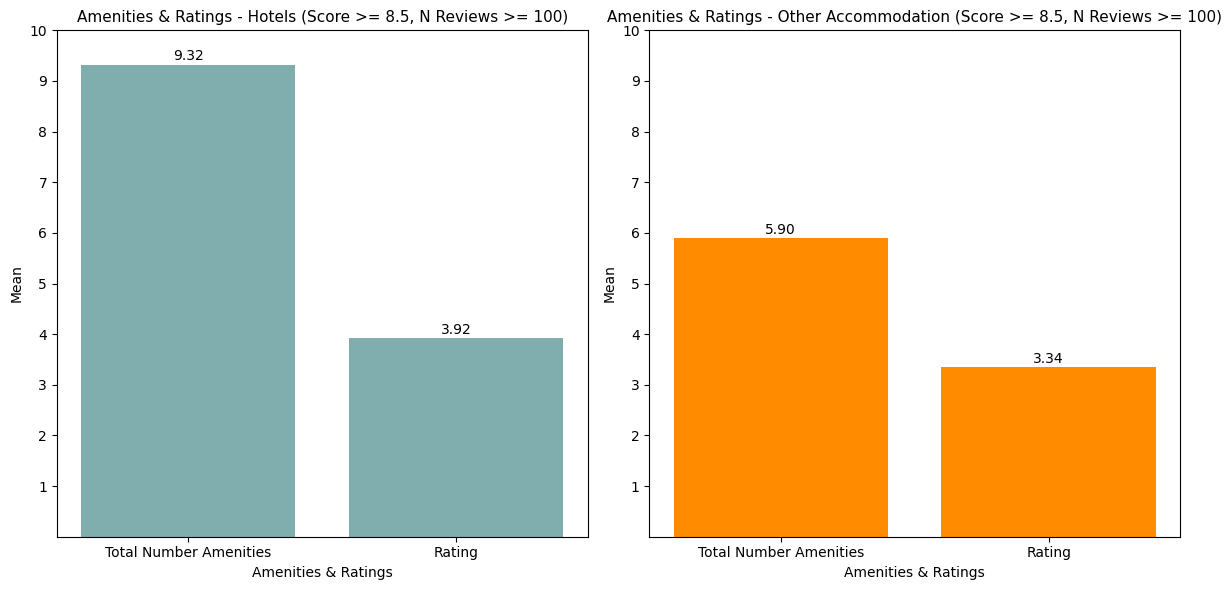

In [58]:
# Filter hotels with Review Score >= 8,5 and over 100 reviews
hotels_filtered = df[(df['Is Hotel'] == 1) & (df['Review Score'] >=8.5) & (df['Number Reviews'] >= 100)]

# Filter other accommodations with Review Score >= 8,5 and over 100 reviews
non_hotels_filtered = df[(df['Is Hotel'] == 0) & (df['Review Score'] >= 8.5) & (df['Number Reviews'] >= 100)]

# Calculate average number of amenities for each type
amenities_ratings_hotels_mean = hotels_filtered.loc[:, ['Total Number Amenities', 'Rating']].mean()
amenities_ratings_non_hotels_mean = non_hotels_filtered.loc[:, ['Total Number Amenities', 'Rating']].mean()

# Order DESC
amenities_ratings_hotels_sorted = amenities_ratings_hotels_mean.sort_values(ascending=False)
amenities_ratings_non_hotels_sorted = amenities_ratings_non_hotels_mean.sort_values(ascending=False)

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot graph for hotels
bars1 = ax1.bar(amenities_ratings_hotels_sorted.index, amenities_ratings_hotels_sorted.values, color='#80ADAD')
ax1.set_title('Amenities & Ratings - Hotels (Score >= 8.5, N Reviews >= 100)', fontsize=11)
ax1.set_xlabel('Amenities & Ratings')
ax1.set_ylabel('Mean')
ax1.set_yticks(range(1, 11))  

# Add label values 
ax1.bar_label(bars1, labels=[f'{val:.2f}' for val in amenities_ratings_hotels_sorted.values], padding=1)

# Plot graph for other accommodations
bars2 = ax2.bar(amenities_ratings_non_hotels_sorted.index, amenities_ratings_non_hotels_sorted.values, color='#FF8C00')
ax2.set_title('Amenities & Ratings - Other Accommodation (Score >= 8.5, N Reviews >= 100)', fontsize=11)
ax2.set_xlabel('Amenities & Ratings')
ax2.set_ylabel('Mean')
ax2.set_yticks(range(1, 11))  

# Add label values
ax2.bar_label(bars2, labels=[f'{val:.2f}' for val in amenities_ratings_non_hotels_sorted.values], padding=1)

# Adjust plots
plt.tight_layout()

# Show image
plt.show()

### Table - Cities that do not have Accommodations with high Review Score and high Reviews

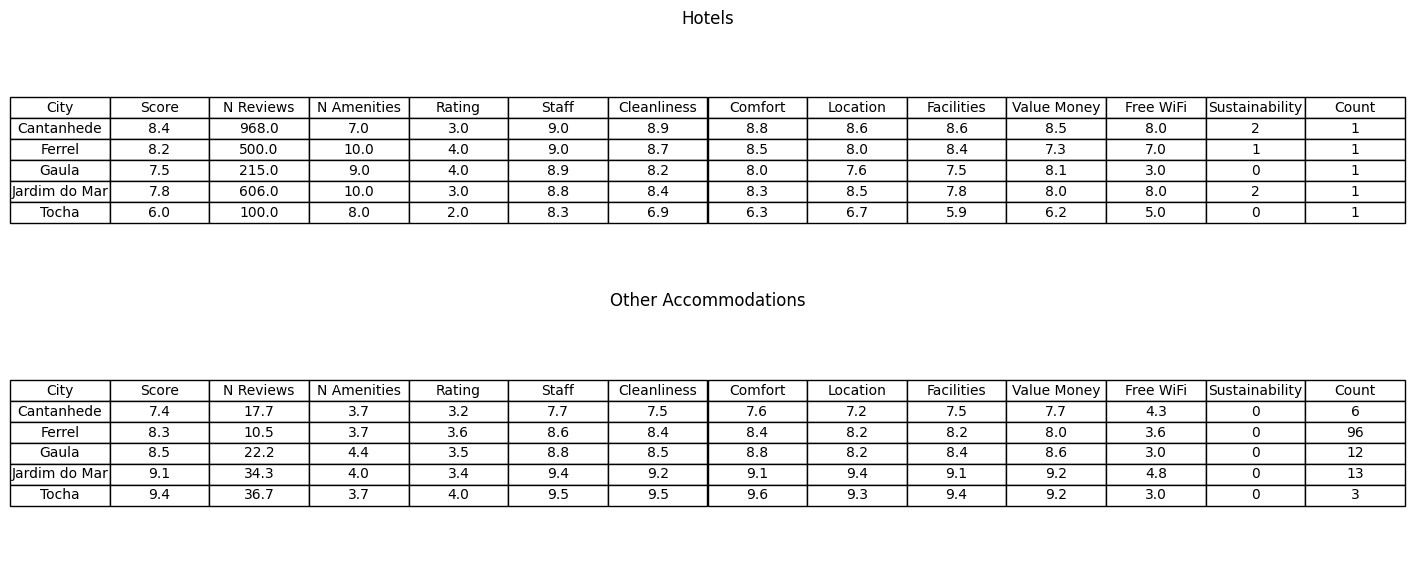

In [59]:
# Filter cities without accommodations with Review Score > 8.5 and over 100 reviews 
filtered_cities = df.groupby('City').filter(lambda x: (
    x['Is Hotel'].any() and not ((x['Review Score'] > 8.5) & (x['Number Reviews'] > 100)).any()
))

# Calculate average number of amenities, ratings and types of reviews based on City and its type
mean_by_city = filtered_cities.groupby(['City', 'Is Hotel']).agg({
    'Review Score':'mean',
    'Number Reviews':'mean',
    'Total Number Amenities': 'mean',
    'Rating': 'mean',
    'Staff Review': 'mean',
    'Cleanliness Review': 'mean',
    'Comfort Review': 'mean',
    'Location Review': 'mean',
    'Facilities Review': 'mean',
    'Value for money Review': 'mean',
    'Free WiFi Review': 'mean'
}).reset_index()

# Calculate mode for Sustainable level by city and type of accommodation
mode_by_city = filtered_cities.groupby(['City', 'Is Hotel']).agg({
    'Sustainable Level': lambda x: x.mode().iat[0]
}).reset_index()

# Filter Hotels and Other Type Accommodations 
hotels_table = mean_by_city[mean_by_city['Is Hotel'] == 1].drop(columns='Is Hotel').rename(columns={'City': 'City'})
hotels_table['Sustainable Level (Mode)'] = mode_by_city[mode_by_city['Is Hotel'] == 1]['Sustainable Level'].values

other_accommodation_table = mean_by_city[mean_by_city['Is Hotel'] == 0].drop(columns='Is Hotel').rename(columns={'City': 'City'})
other_accommodation_table['Sustainable Level (Mode)'] = mode_by_city[mode_by_city['Is Hotel'] == 0]['Sustainable Level'].values

# Round values to one decimal case 
hotels_table = hotels_table.round(1)
other_accommodation_table = other_accommodation_table.round(1)

# Add column with number of accommodations
hotels_table['Count'] = filtered_cities[filtered_cities['Is Hotel'] == 1].groupby('City').size().values
other_accommodation_table['Count'] = filtered_cities[filtered_cities['Is Hotel'] == 0].groupby('City').size().values

# Configure tables
fig, axes = plt.subplots(2, 1, figsize=(15, 7))

# Table for hotels
table_hotels = axes[0].table(cellText=hotels_table.values,
                             colLabels=['City', 'Score', 'N Reviews','N Amenities', 'Rating', 'Staff', 'Cleanliness', 'Comfort',
                                         'Location', 'Facilities', 'Value Money', 'Free WiFi', 'Sustainability', 'Count'],
                             cellLoc='center',
                             loc='center')

table_hotels.auto_set_font_size(False)
table_hotels.set_fontsize(10)
table_hotels.scale(1.2, 1.2)
axes[0].set_title('Hotels')

# Table for other accommodations
table_other_accommodation = axes[1].table(cellText=other_accommodation_table.values,
                                         colLabels=['City', 'Score', 'N Reviews','N Amenities', 'Rating', 'Staff', 'Cleanliness', 'Comfort',
                                                     'Location', 'Facilities', 'Value Money', 'Free WiFi', 'Sustainability', 'Count'],
                                         cellLoc='center',
                                         loc='center')

table_other_accommodation.auto_set_font_size(False)
table_other_accommodation.set_fontsize(10)
table_other_accommodation.scale(1.2, 1.2)
axes[1].set_title('Other Accommodations')

# Remove axis
for ax in axes:
    ax.axis('off')

# Adjust space between tables 
plt.subplots_adjust(hspace=0.1)

# Save figure for report
plt.savefig('Table_Cities.jpg')

# Show tables
plt.show()

### Tocha - Amenities

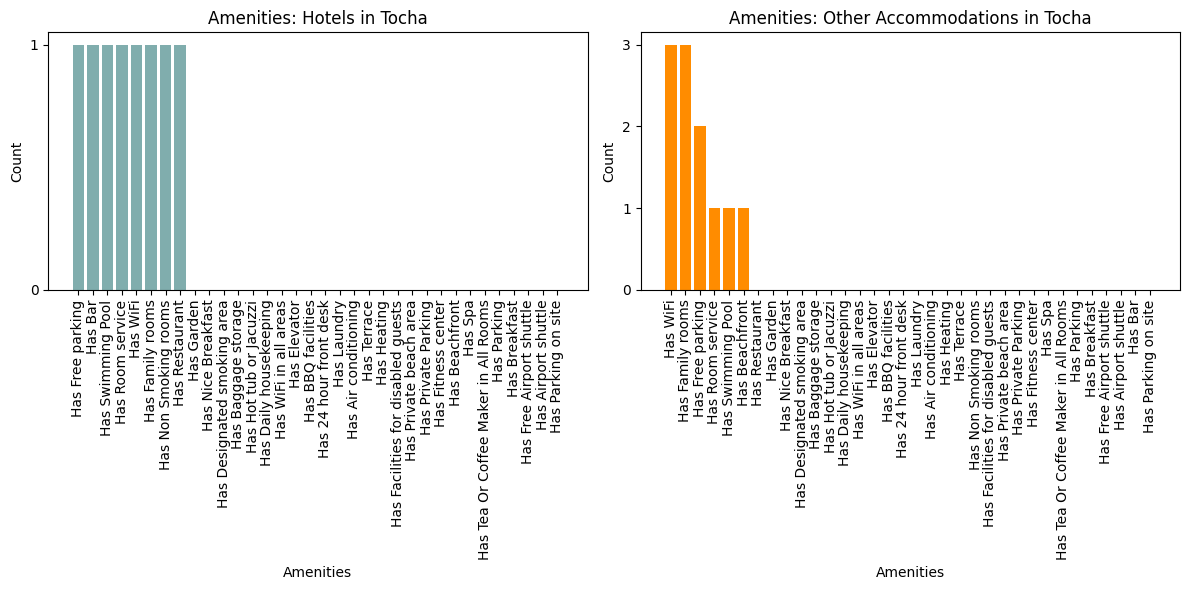

In [60]:
# Filter accommodations in "Tocha"
tocha_filtered = df[(df['City'] == 'Tocha') & ((df['Is Hotel'] == 1) | (df['Is Hotel'] == 0))]

# Calculate number of Hotels and other accommodations
total_hotels = len(tocha_filtered[tocha_filtered['Is Hotel'] == 1])
total_non_hotels = len(tocha_filtered[tocha_filtered['Is Hotel'] == 0])

# Calculate count amenities for hotels and other accommodations 
amenities_hotels_filtered = tocha_filtered[tocha_filtered['Is Hotel'] == 1].iloc[:, 18:52].sum()
amenities_non_hotels_filtered = tocha_filtered[tocha_filtered['Is Hotel'] == 0].iloc[:, 18:52].sum()

# Order amenities DESC 
amenities_hotels_sorted = amenities_hotels_filtered.sort_values(ascending=False)
amenities_non_hotels_sorted = amenities_non_hotels_filtered.sort_values(ascending=False)

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot for amenities in "Tocha" - Hotels
ax1.bar(amenities_hotels_sorted.index, amenities_hotels_sorted.values, color='#80ADAD')
ax1.set_title('Amenities: Hotels in Tocha')
ax1.set_xlabel('Amenities')
ax1.set_ylabel('Count')
ax1.set_xticks(range(len(amenities_hotels_sorted)))
ax1.set_xticklabels(amenities_hotels_sorted.index, rotation=90)
ax1.set_yticks(range(int(amenities_hotels_sorted.max()) + 1))

# Bar plot for aminities in "Tocha" - Other Accommodations
ax2.bar(amenities_non_hotels_sorted.index, amenities_non_hotels_sorted.values, color='#FF8C00')
ax2.set_title('Amenities: Other Accommodations in Tocha')
ax2.set_xlabel('Amenities')
ax2.set_ylabel('Count')
ax2.set_xticks(range(len(amenities_non_hotels_sorted)))
ax2.set_xticklabels(amenities_non_hotels_sorted.index, rotation=90)
ax2.set_yticks(range(int(amenities_non_hotels_sorted.max()) + 1))

# Adjust plots
plt.tight_layout()

# Show graphs
plt.show()

# 6. NPL - Description field

All Accommodations

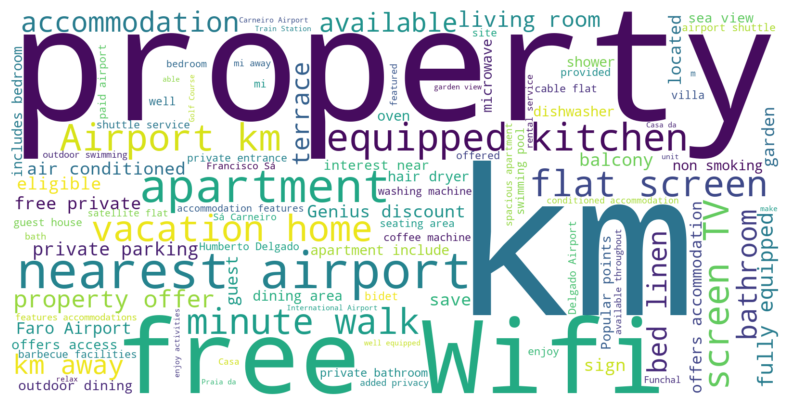

In [64]:
# Remove empty description for this graphs purpose
text = ' '.join(df['Description'].dropna().tolist())

# Create and generate a word cloud image:
wordcloud = WordCloud(
    max_words=100,
    background_color="white",
    width=1600,
    height=800,
    random_state=1,
    ).generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig("Booking_wordcloud.png", dpi=300)
plt.show()


Only Hotels

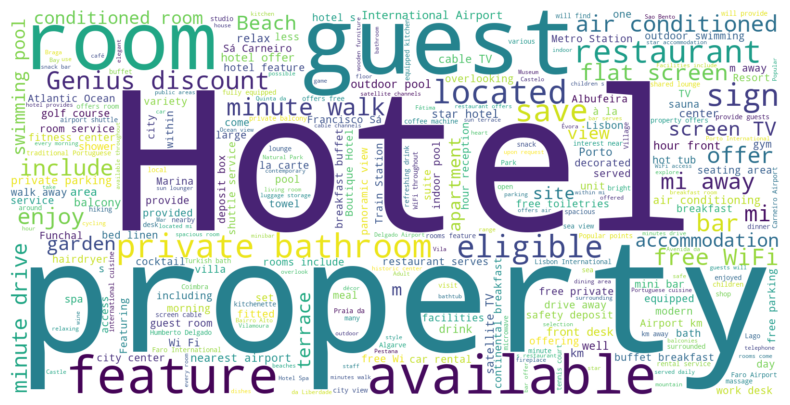

In [235]:
# Filter only hotels
filtered_df = df[df['Is Hotel'] == 1]

# Remove empty description for this graphs purpose
text = ' '.join(filtered_df['Description'].dropna().tolist())

# Create and generate a word cloud image:
wordcloud = WordCloud(
    max_words=300,
    background_color="white",
    width=1600,
    height=800,
    random_state=1,
    ).generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

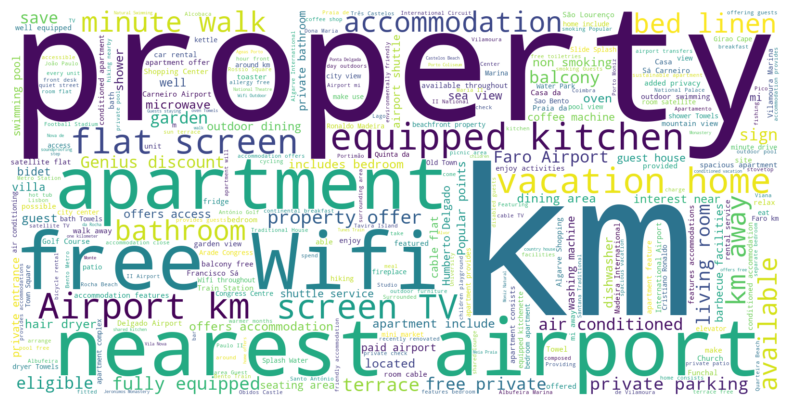

In [236]:
# Filter only other types of accommodations 
filtered_df = df[df['Is Hotel'] == 0]

# Remove empty description for this graphs purpose
text = ' '.join(filtered_df['Description'].dropna().tolist())

# Create and generate a word cloud image:
wordcloud = WordCloud(
    max_words=300,
    background_color="white",
    width=1600,
    height=800,
    random_state=1,
    ).generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()